# Penicillin concentration Analysis

# Interactive Plotting
## Trend Analysis: Parameter of Interest vs. Time

In [1]:
import pandas as pd
import os
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import seaborn as sns
import matplotlib.pyplot as plt

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Load all batches into a single DataFrame
all_batches = []
for i in range(61, 91):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    df['Batch ID'] = i
    all_batches.append(df)
all_batches_df = pd.concat(all_batches, ignore_index=True)

# Calculate statistical information for each batch
stats = []
for i in range(61, 91):
    df = all_batches_df[all_batches_df['Batch ID'] == i]
    mean_1 = df['Penicillin concentration(P:g/L)'].mean()
    median_1 = df['Penicillin concentration(P:g/L)'].median()
    std_1 = df['Penicillin concentration(P:g/L)'].std()
    min_1 = df['Penicillin concentration(P:g/L)'].min()
    max_1 = df['Penicillin concentration(P:g/L)'].max()
    mode_1 = df['Penicillin concentration(P:g/L)'].mode()
    mode_1_value = mode_1.iloc[0] if not mode_1.empty else None
    Q1 = df['Penicillin concentration(P:g/L)'].quantile(0.25)
    Q3 = df['Penicillin concentration(P:g/L)'].quantile(0.75)
    IQR = Q3 - Q1

    stats.append({
        'Batch': i,
        'Mean': mean_1,
        'Median': median_1,
        'Mode': mode_1_value,
        'Std Dev': std_1,
        'Min': min_1,
        'Max': max_1,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR
    })
stats_df = pd.DataFrame(stats)

# Merge stats with the main DataFrame for hover info
all_batches_df = all_batches_df.merge(stats_df, left_on='Batch ID', right_on='Batch')

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Penicillin Concentration Analysis", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(61, 91)],
        value=[1],
        multi=True,
        clearable=False,
        style={'width': '50%', 'margin': 'auto'}
    ),
    html.Button('Show All Batches', id='show-all-button', n_clicks=0, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    dcc.Graph(id='line-plot', style={'height': '60vh'})
])

@app.callback(
    Output('batch-selector', 'value'),
    [Input('show-all-button', 'n_clicks')]
)
def show_all_batches(n_clicks):
    if n_clicks > 0:
        return [i for i in range(61, 91)]
    return [1]

@app.callback(
    Output('line-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_line_plot(selected_batches):
    filtered_df = all_batches_df[all_batches_df['Batch ID'].isin(selected_batches)]
    fig = px.line(filtered_df, x='Time (h)', y='Penicillin concentration(P:g/L)', color='Batch ID',
                  title='Penicillin Concentration Over Time',
                  hover_data={
                      'Mean': True, 'Median': True, 'Mode': True,
                      'Std Dev': True, 'Min': True, 'Max': True,
                      'Q1': True, 'Q3': True, 'IQR': True
                  })

    fig.update_layout(
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#1e1e1e',
        font_color='#ffffff'
    )
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


## Statistical Analysis & Distribution Plotting (Static) for Each Batch "Separately" 
### Batches 61-90: Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy

In [2]:
import os
import pandas as pd

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Parameter of interest
par = 'Penicillin concentration(P:g/L)'

# Initialize an empty list to store DataFrames for each batch
batch_dfs = []

# Iterate over batch numbers
for i in range(61, 91):
    # Construct the file path for the current batch
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Calculate statistical values of the "Parameter of Interest" column
    mean_1 = df[par].mean()
    median_1 = df[par].median()
    std_1 = df[par].std()
    min_1 = df[par].min()
    max_1 = df[par].max()
    mode_1 = df[par].mode()
    mode_1_value = mode_1.iloc[0] if not mode_1.empty else None
    Q1 = df[par].quantile(0.25)
    Q3 = df[par].quantile(0.75)
    IQR = Q3 - Q1

    # Create a DataFrame with statistical values for the current batch
    batch_summary_df = pd.DataFrame({
        'Batch': [i], 
        f'Mean_{par}': [mean_1], 
        f'Median_{par}': [median_1], 
        f'Mode_{par}': [mode_1_value], 
        f'Std_{par}': [std_1], 
        f'Min_{par}': [min_1], 
        f'Max_{par}': [max_1], 
        f'Q1_{par}': [Q1], 
        f'Q3_{par}': [Q3], 
        f'IQR_{par}': [IQR]
    })

    # Append the DataFrame to the list
    batch_dfs.append(batch_summary_df)

# Concatenate all DataFrames in the list into a single DataFrame
stats_1 = pd.concat(batch_dfs, ignore_index=True)

# Display the summary DataFrame
stats_1


,Batch,Mean_Penicillin concentration(P:g/L),Median_Penicillin concentration(P:g/L),Mode_Penicillin concentration(P:g/L),Std_Penicillin concentration(P:g/L),Min_Penicillin concentration(P:g/L),Max_Penicillin concentration(P:g/L),Q1_Penicillin concentration(P:g/L),Q3_Penicillin concentration(P:g/L),IQR_Penicillin concentration(P:g/L)
0,61,15.332169,17.1380,2.732300e+01,9.602812,8.939800e-04,27.330,6.530300,24.48400,17.953700
1,62,17.119947,18.8085,3.216900e+01,11.269254,9.054200e-04,32.198,6.357950,27.21375,20.855800
2,63,15.547382,17.4590,2.873000e+01,10.208773,9.070300e-04,28.739,5.721350,24.83325,19.111900
3,64,16.149425,17.8360,9.016000e-04,10.529261,9.016000e-04,30.825,6.200475,25.40550,19.205025
4,65,16.923631,18.3470,9.023900e-04,11.179528,9.023900e-04,32.211,6.409600,27.19800,20.788400
5,66,14.186085,15.7550,2.669100e+01,9.479047,9.024700e-04,26.691,4.893025,22.88125,17.988225
6,67,9.887853,9.8340,9.057700e-04,7.203254,9.057700e-04,21.596,2.726550,16.43900,13.712450
7,68,15.415199,16.4435,1.179900e+01,10.175763,9.082800e-04,29.767,6.034075,24.45675,18.422675
8,69,14.664348,15.5230,2.732600e+01,9.812611,9.091200e-04,27.346,5.208800,24.05300,18.844200
9,70,14.958610,16.1795,1.202200e+01,9.571844,9.078300e-04,28.121,6.296075,23.42050,17.124425


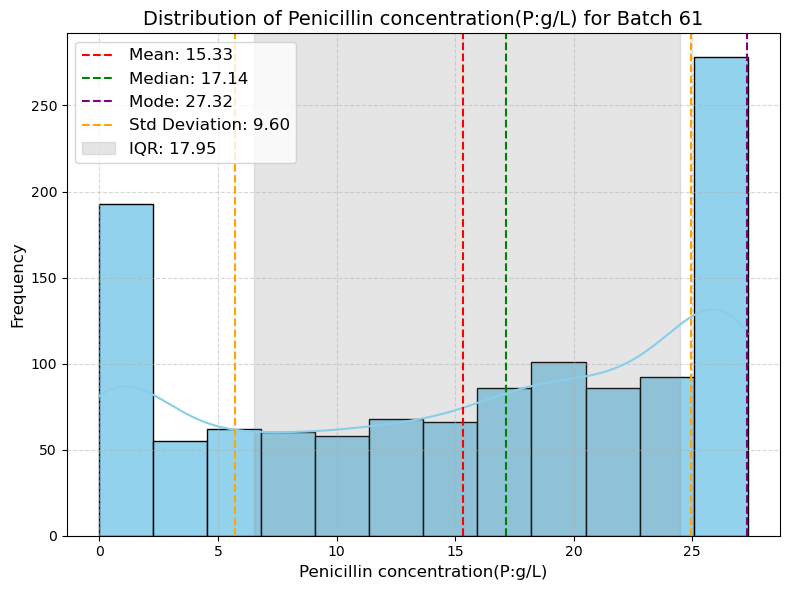

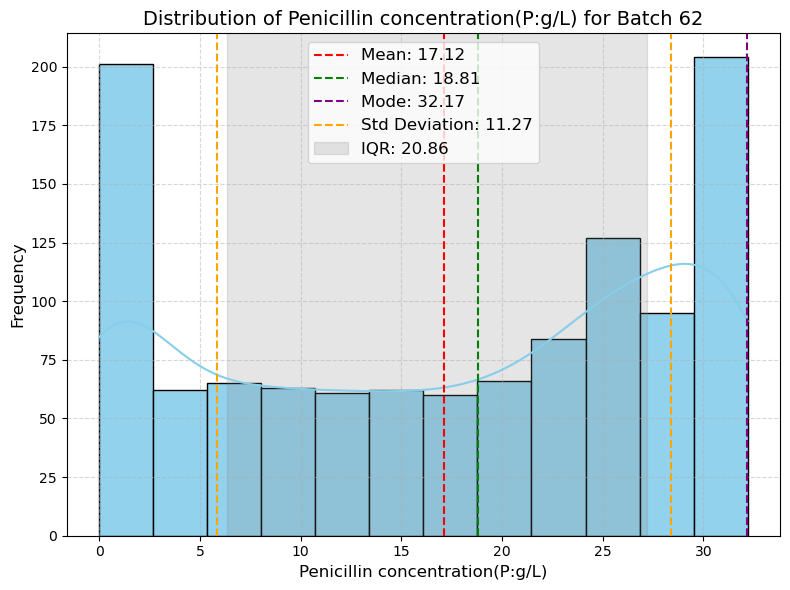

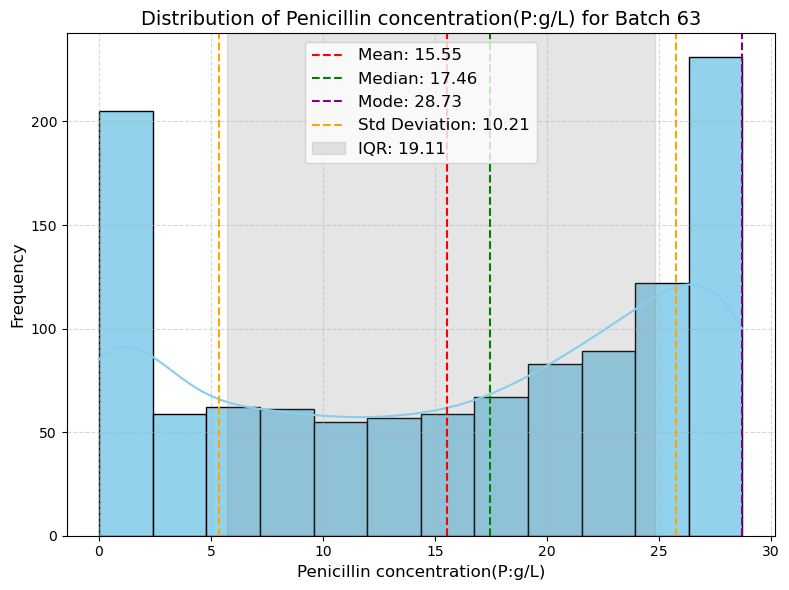

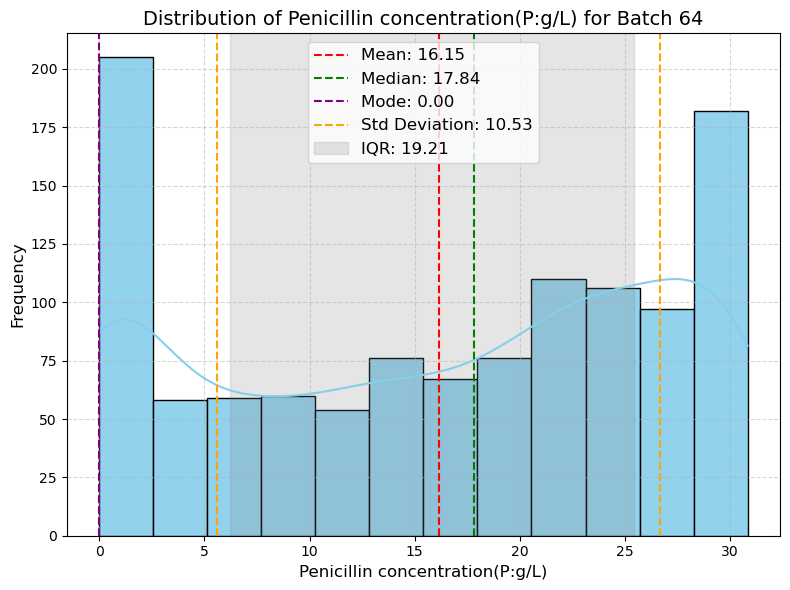

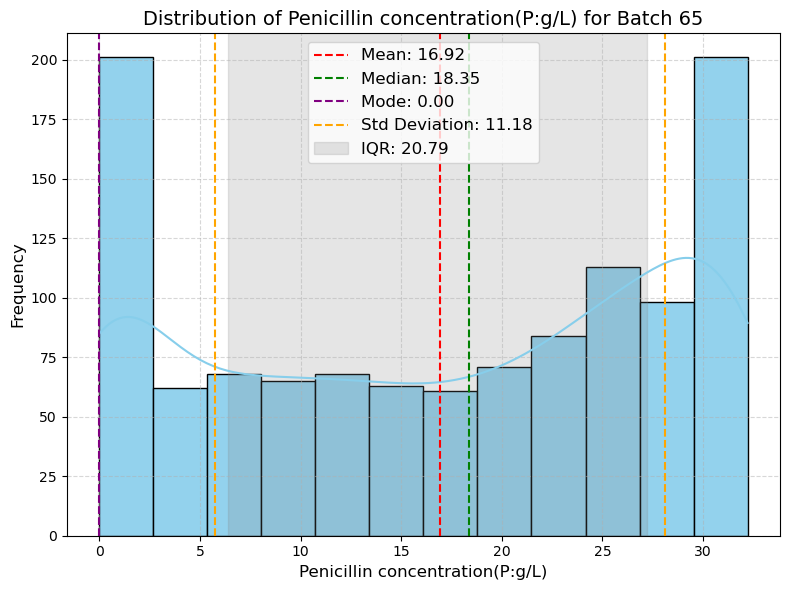

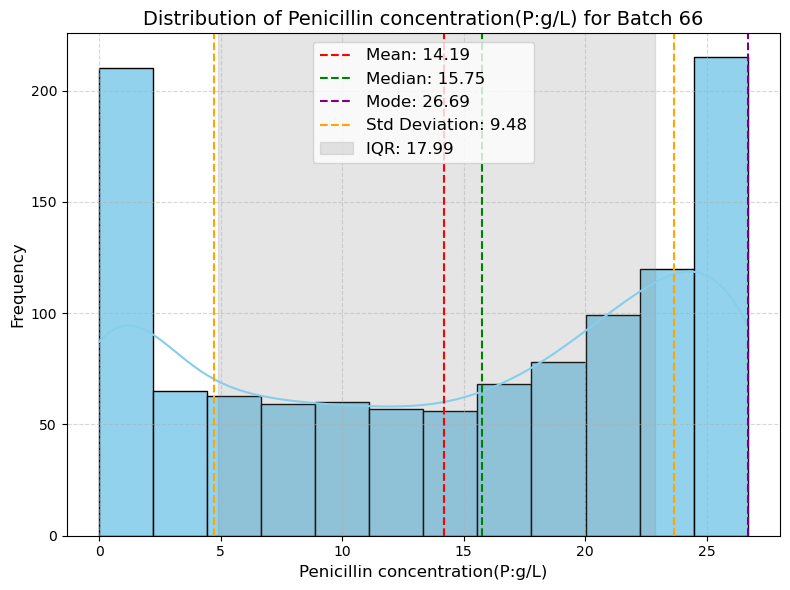

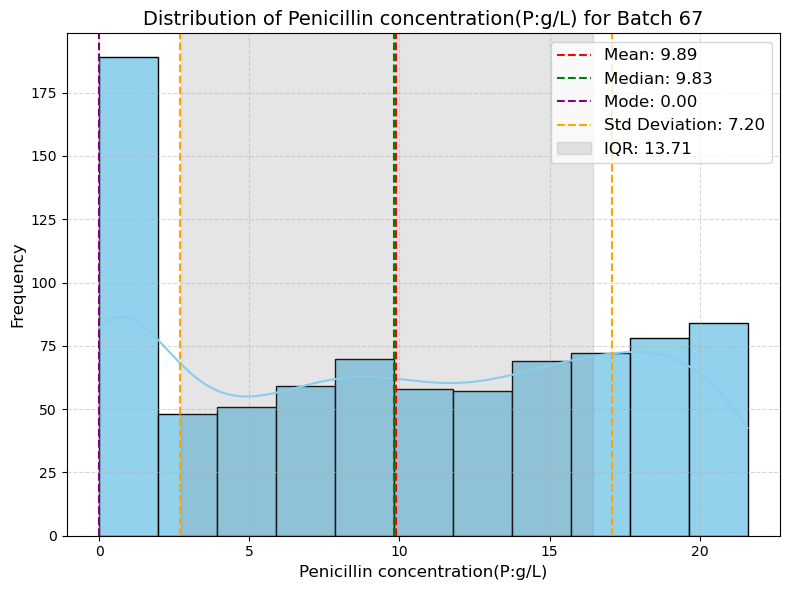

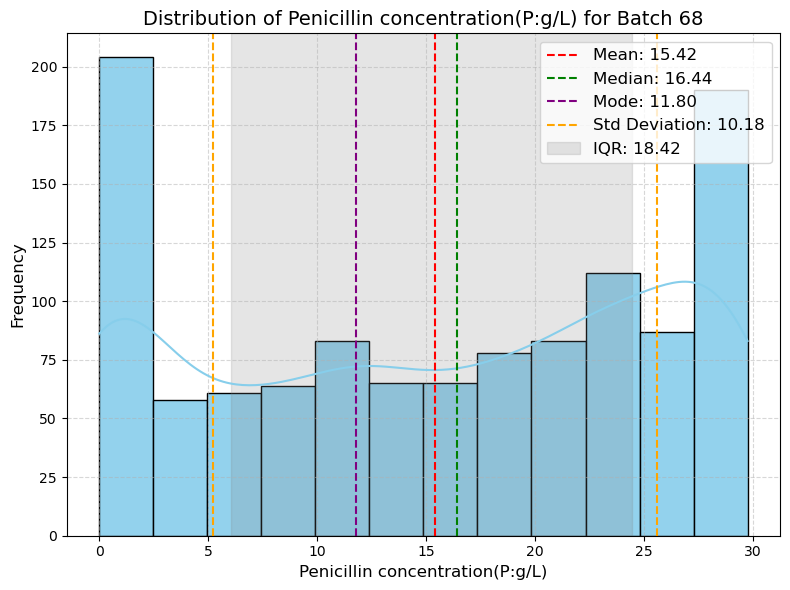

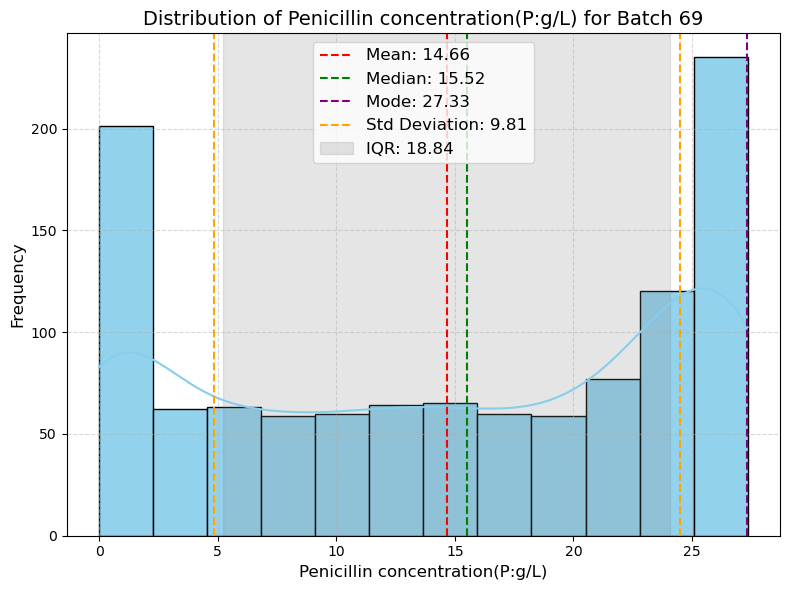

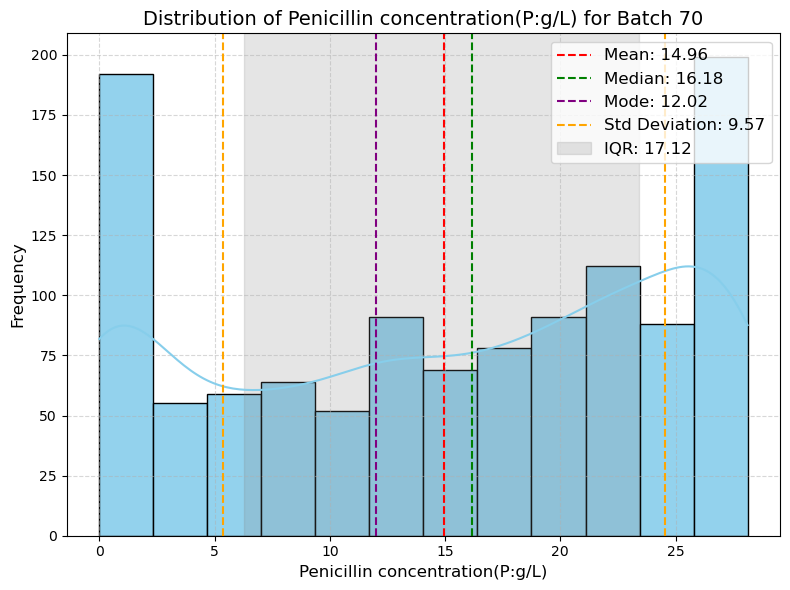

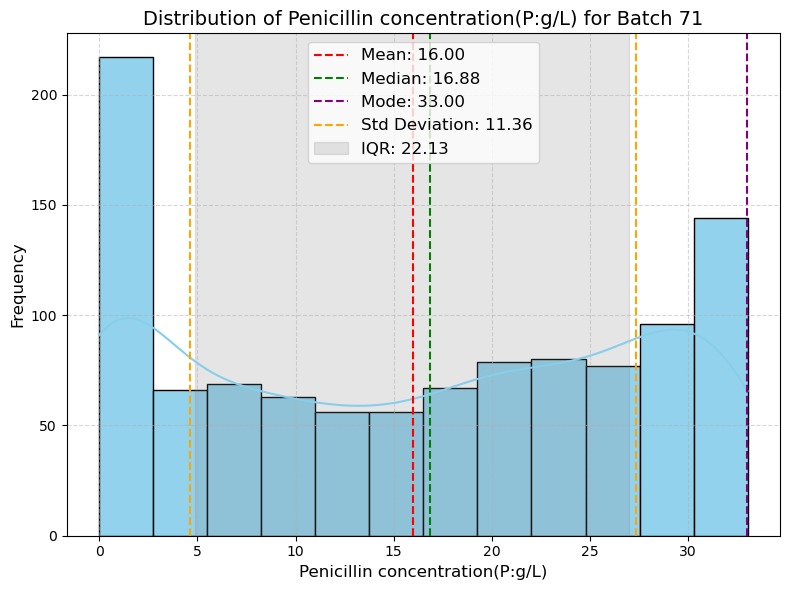

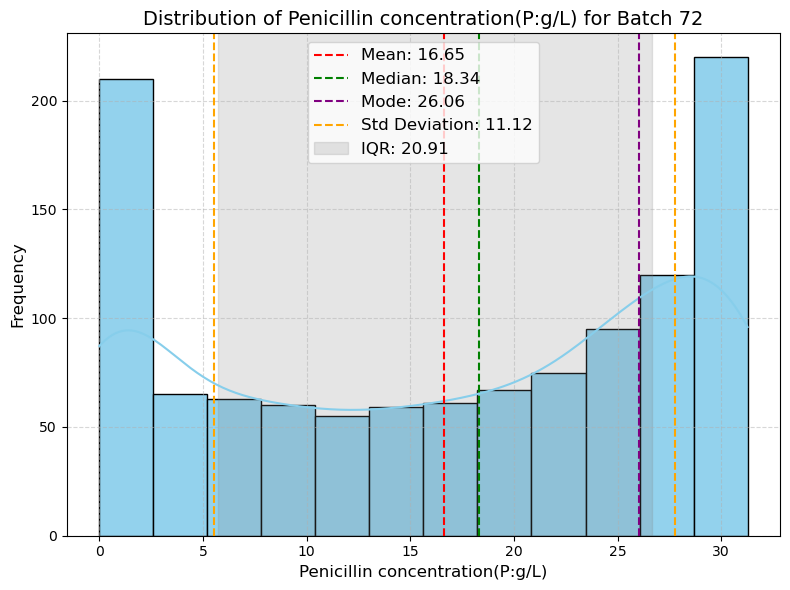

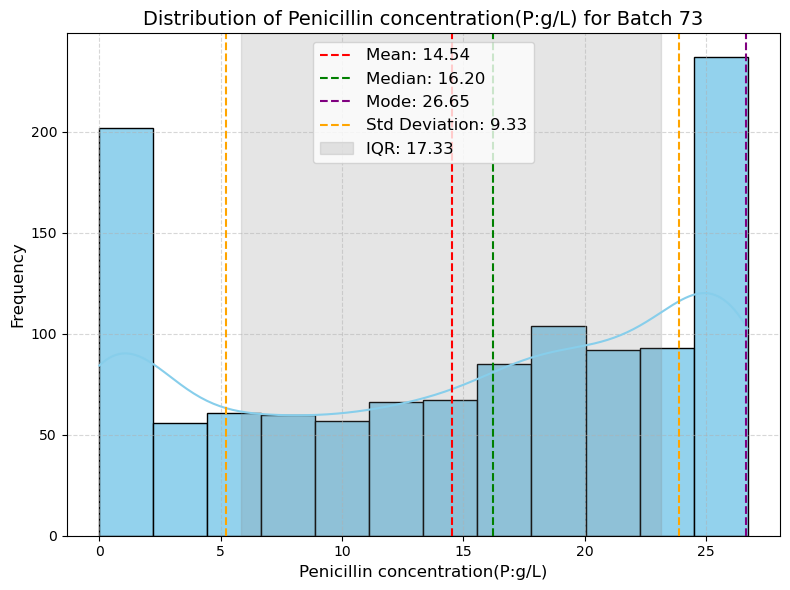

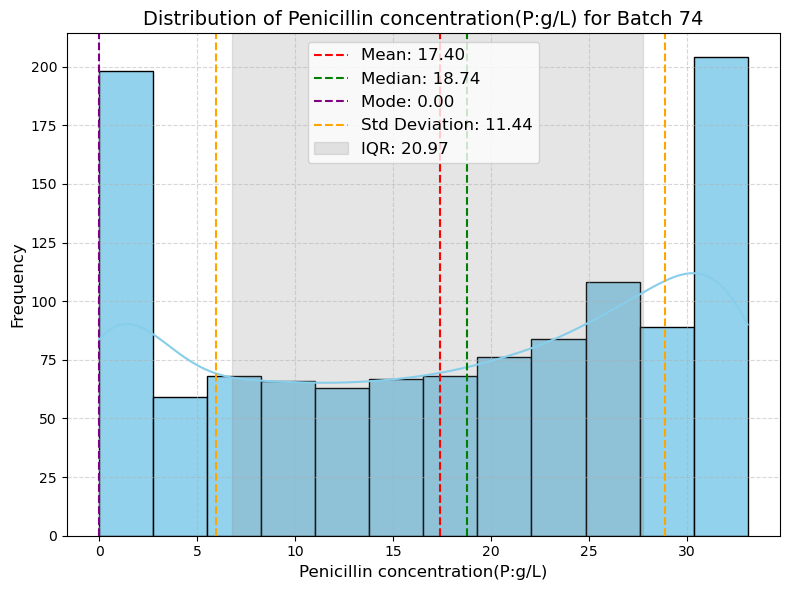

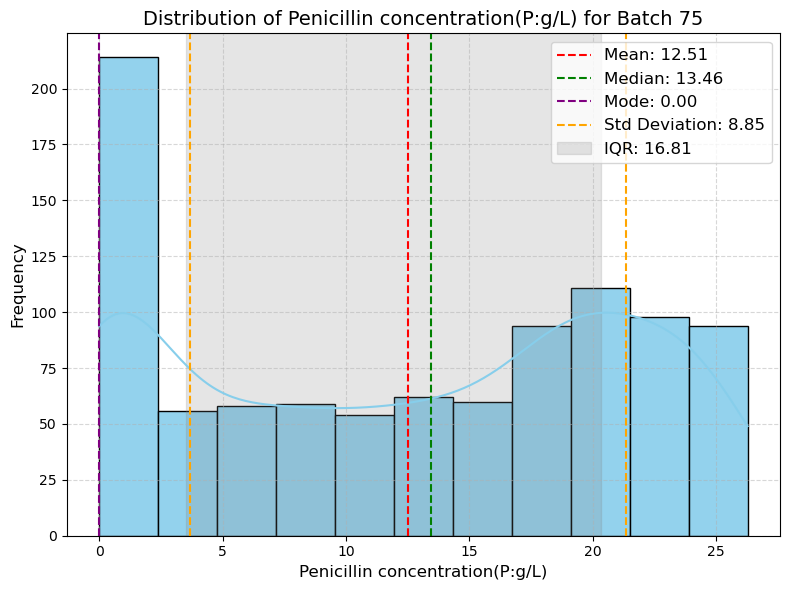

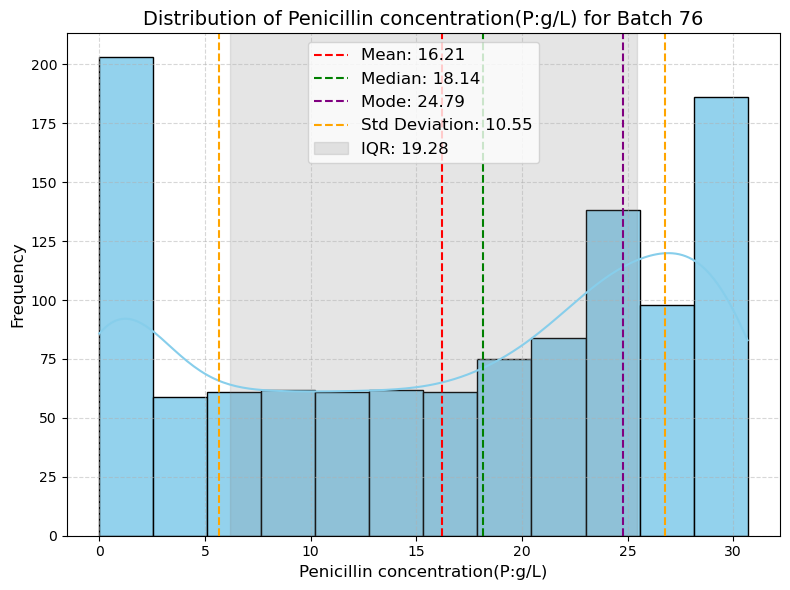

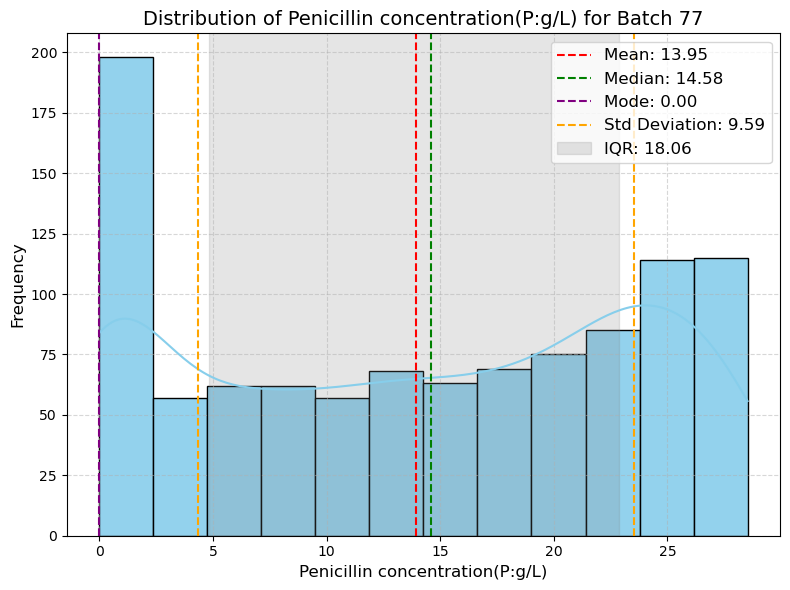

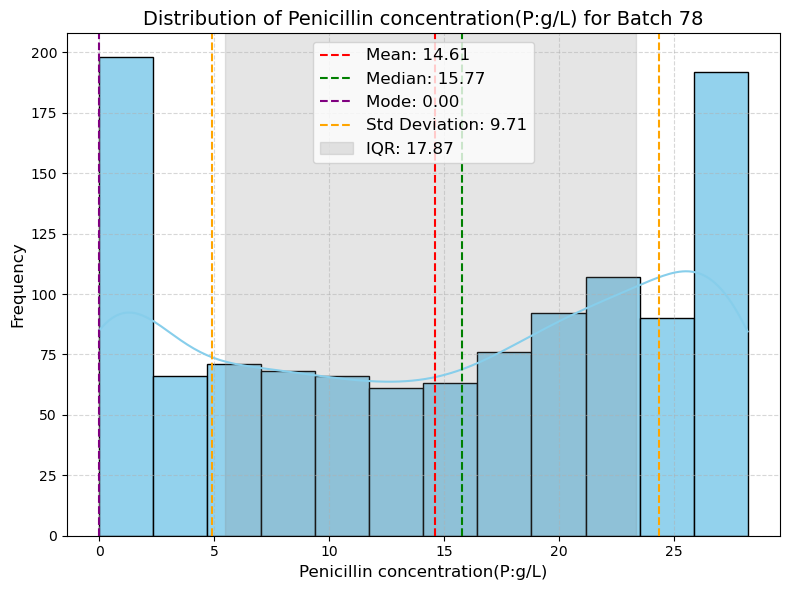

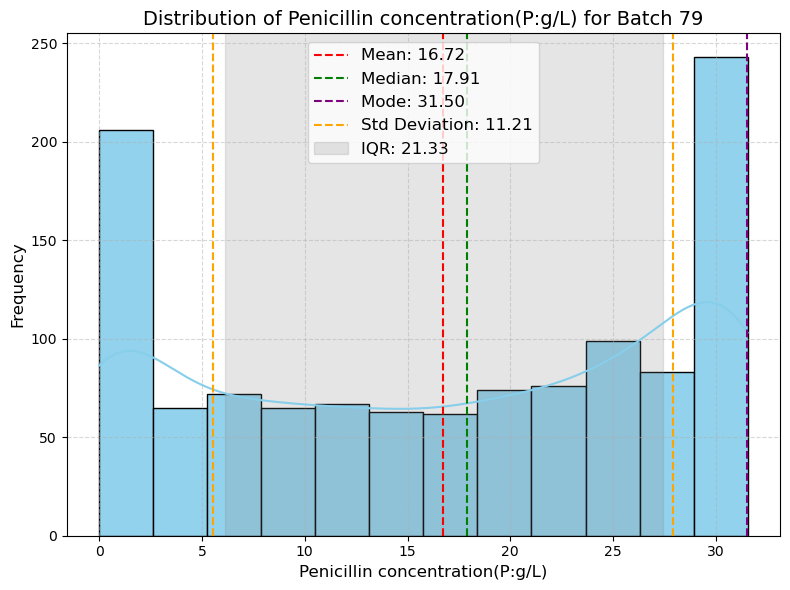

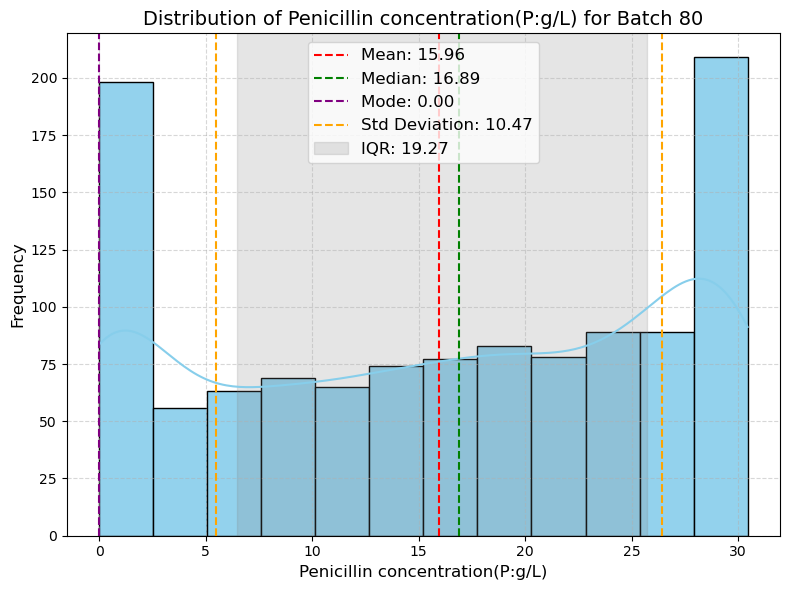

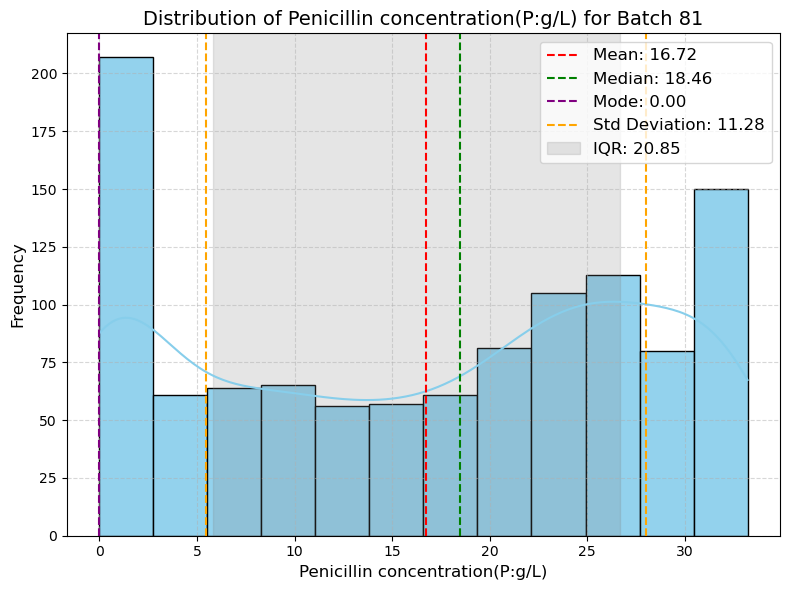

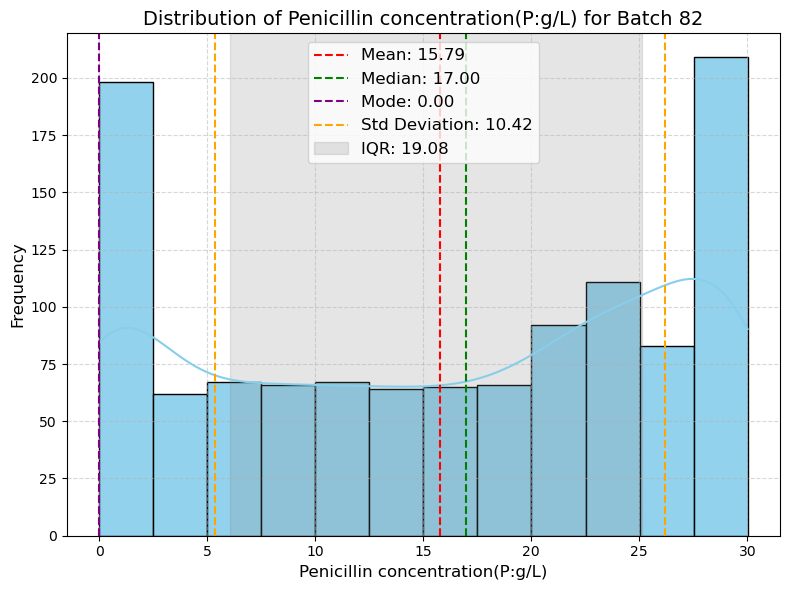

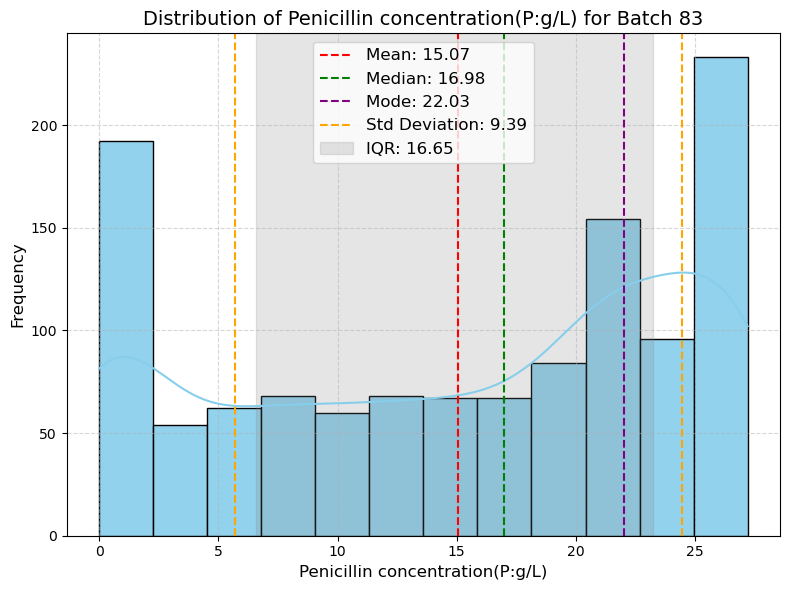

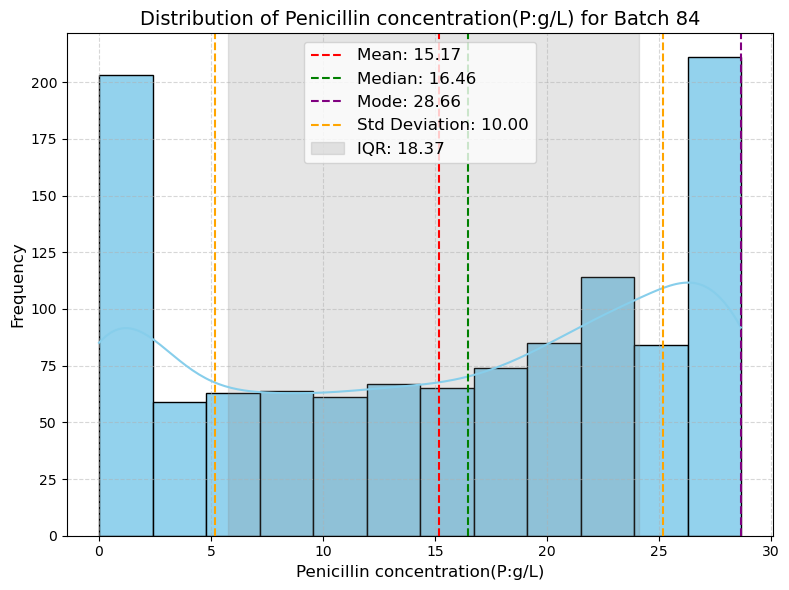

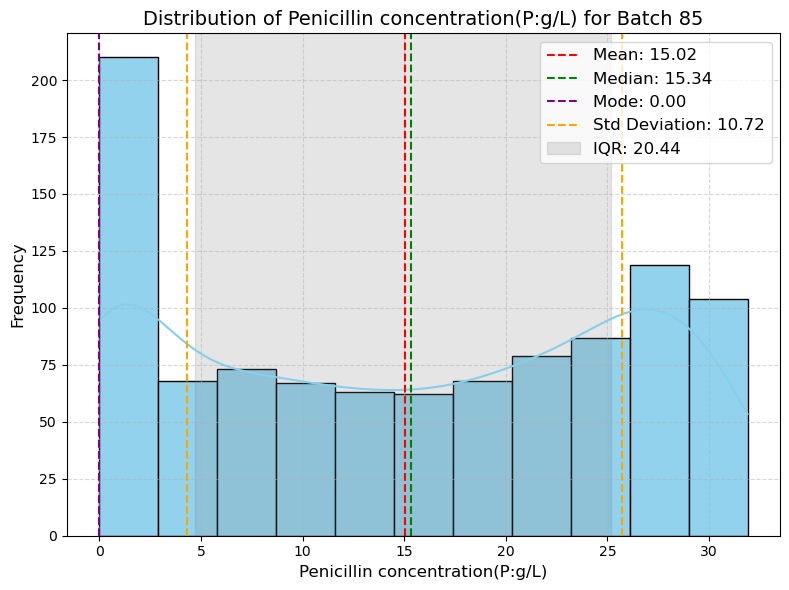

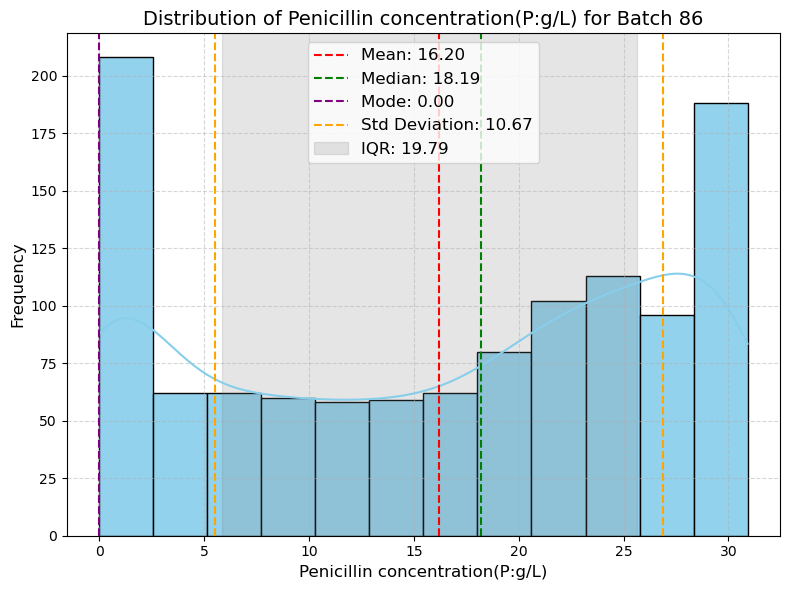

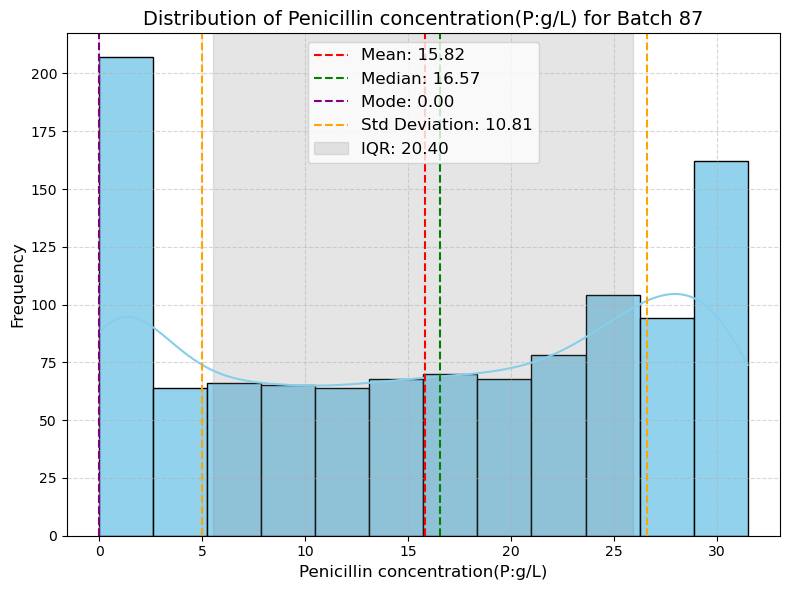

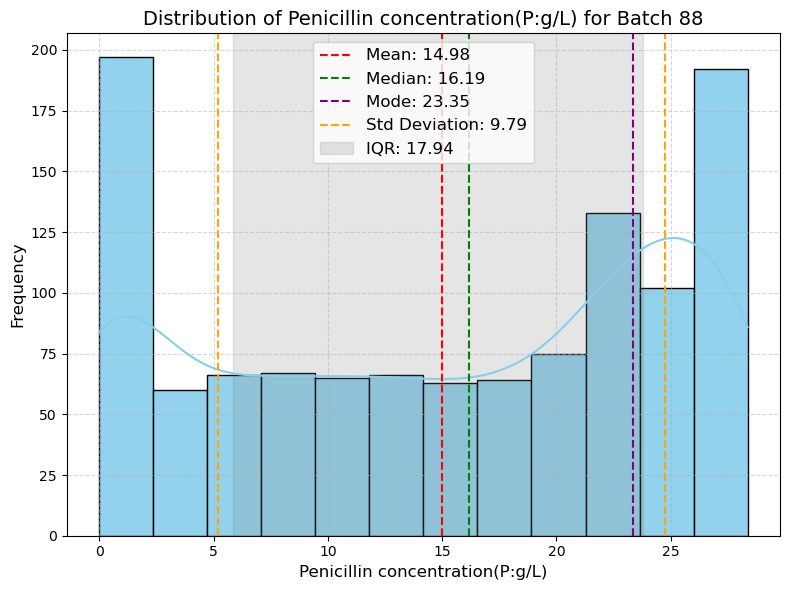

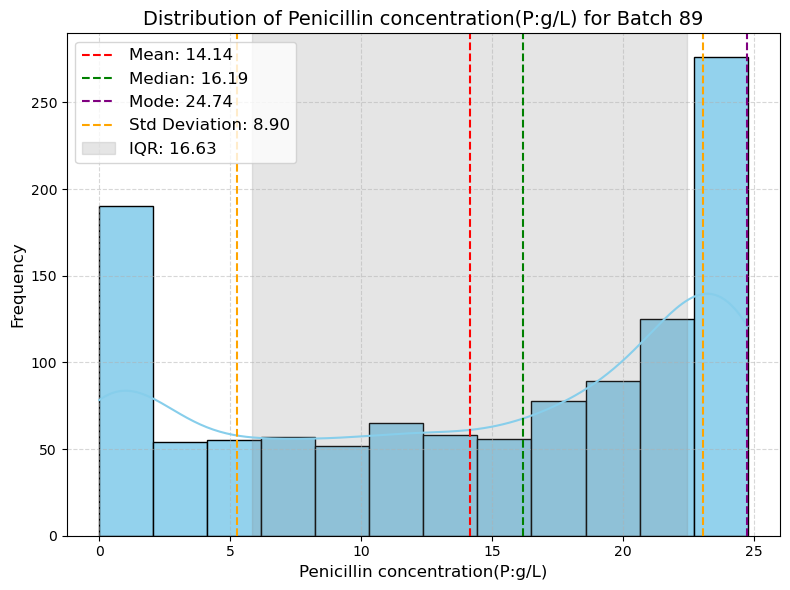

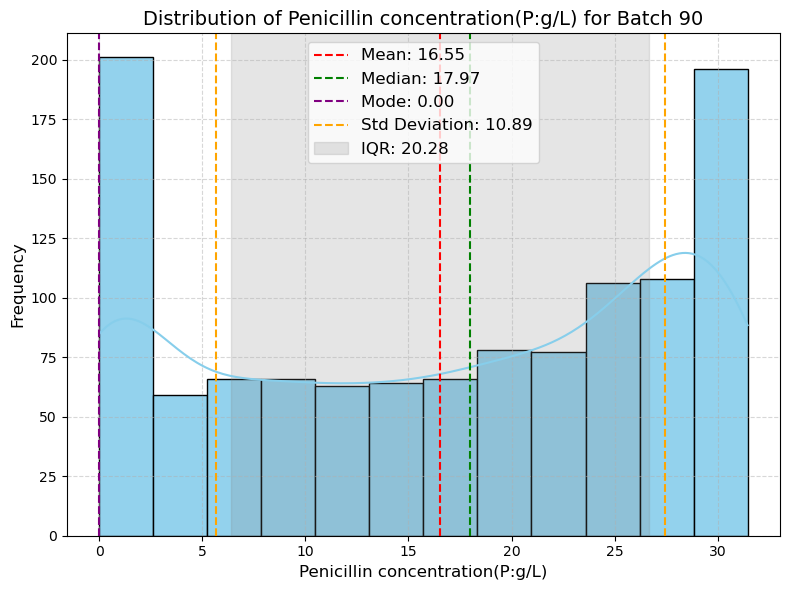

In [3]:
# Plot histogram for each batch
for i in range(61, 91):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=par, kde=True, color='skyblue', alpha=0.9)
    plt.title(f'Distribution of {par} for Batch {i}', fontsize=14)
    plt.xlabel(par, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

    # Annotate mean, median, and mode values on the histogram
    plt.axvline(df[par].mean(), color='red', linestyle='--', linewidth=1.5, label=f'Mean: {df[par].mean():.2f}')
    plt.axvline(df[par].median(), color='green', linestyle='--', linewidth=1.5, label=f'Median: {df[par].median():.2f}')
    mode_value = df[par].mode().iloc[0] if not df[par].mode().empty else None
    if mode_value:
        plt.axvline(mode_value, color='purple', linestyle='--', linewidth=1.5, label=f'Mode: {mode_value:.2f}')

    # Add one standard deviation below and above the mean
    std_dev = df[par].std()
    plt.axvline(df[par].mean() - std_dev, color='orange', linestyle='--', linewidth=1.5, label=f'Std Deviation: {std_dev:.2f}')
    plt.axvline(df[par].mean() + std_dev, color='orange', linestyle='--', linewidth=1.5)

    # Calculate interquartile range (IQR) and add shaded region
    Q1 = df[par].quantile(0.25)
    Q3 = df[par].quantile(0.75)
    IQR = Q3 - Q1
    plt.axvspan(Q1, Q3, color='gray', alpha=0.2, label=f'IQR: {IQR:.2f}')

    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


## Combined Statistical Analysis and Distribution Plotting: Aggregated Batch Data
### Batches 61-90: Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy

In [4]:
import os
import pandas as pd

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Parameter of interest
par = 'Penicillin concentration(P:g/L)'

# Initialize an empty list to store the parameter values from all batches
combined_parameter_values = []

# Iterate over batch numbers
for i in range(61, 91):
    # Construct the file path for the current batch
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Extract the values of the parameter of interest
    parameter_values = df['Penicillin concentration(P:g/L)'].tolist()
    
    # Extend the list with the parameter values from the current batch
    combined_parameter_values.extend(parameter_values)

# Create a DataFrame with the combined parameter values
combined_df = pd.DataFrame({par: combined_parameter_values})

# Calculate MEAN, MEDIAN, STD, MIN, MAX values of the combined parameter values
mean_combined = combined_df[par].mean()
median_combined = combined_df[par].median()
std_combined = combined_df[par].std()
min_combined = combined_df[par].min()
max_combined = combined_df[par].max()
mode_combined = combined_df[par].mode()
mode_combined_value = mode_combined.iloc[0] if not mode_combined.empty else None
Q1_combined = combined_df[par].quantile(0.25)
Q3_combined = combined_df[par].quantile(0.75)
IQR_combined = Q3_combined - Q1_combined

# Create a DataFrame with the statistical values of the combined parameter values
stats_combined = pd.DataFrame({
    'Statistic (Agg Batched)': ['Mean', 'Median', 'Mode', 'Std', 'Min', 'Max', 'Q1', 'Q3', 'IQR'],
    'Value (Agg Batched)': [mean_combined, median_combined, mode_combined_value, std_combined, min_combined, max_combined, Q1_combined, Q3_combined, IQR_combined]
})

# Display the summary DataFrame 
# stats_combined: statistic values for the analyzing parameter for all the batches (1 to 30).
# combined_df: values of the analyzing parameter for all the batches in one column.
# print(stats_combined)
# # print(combined_df)
stats_combined

,Statistic (Agg Batched),Value (Agg Batched)
0,Mean,1.540989e+01
1,Median,1.656000e+01
2,Mode,1.000000e-03
3,Std,1.033733e+01
4,Min,3.694700e-26
5,Max,3.320900e+01
6,Q1,5.675875e+00
7,Q3,2.468800e+01
8,IQR,1.901212e+01


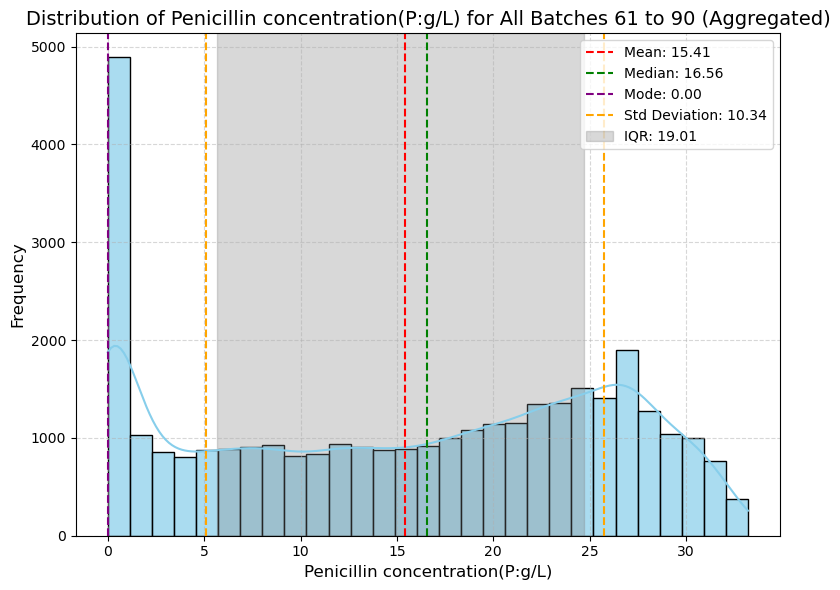

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate interquartile range (IQR)
Q1 = combined_df[par].quantile(0.25)
Q3 = combined_df[par].quantile(0.75)
IQR = Q3 - Q1

plt.figure(figsize=(8, 6))
sns.histplot(data=combined_df, x=par, kde=True, color='skyblue', alpha=0.7)
plt.title(f'Distribution of {par} for All Batches 61 to 90 (Aggregated)', fontsize=14)
plt.xlabel(par, fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate mean, median, and mode values on the histogram
plt.axvline(mean_combined, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_combined:.2f}')
plt.axvline(median_combined, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_combined:.2f}')
plt.axvline(mode_combined_value, color='purple', linestyle='--', linewidth=1.5, label=f'Mode: {mode_combined_value:.2f}')
# Add one standard deviation below and above the mean
plt.axvline(mean_combined - std_combined, color='orange', linestyle='--', linewidth=1.5, label=f'Std Deviation: {std_combined:.2f}')
plt.axvline(mean_combined + std_combined, color='orange', linestyle='--', linewidth=1.5)
# Calculate interquartile range (IQR) and add shaded region
plt.axvspan(Q1, Q3, color='gray', alpha=0.3, label=f'IQR: {IQR:.2f}')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

## Static Plotting for Variabilities between Batches (Comparisons)

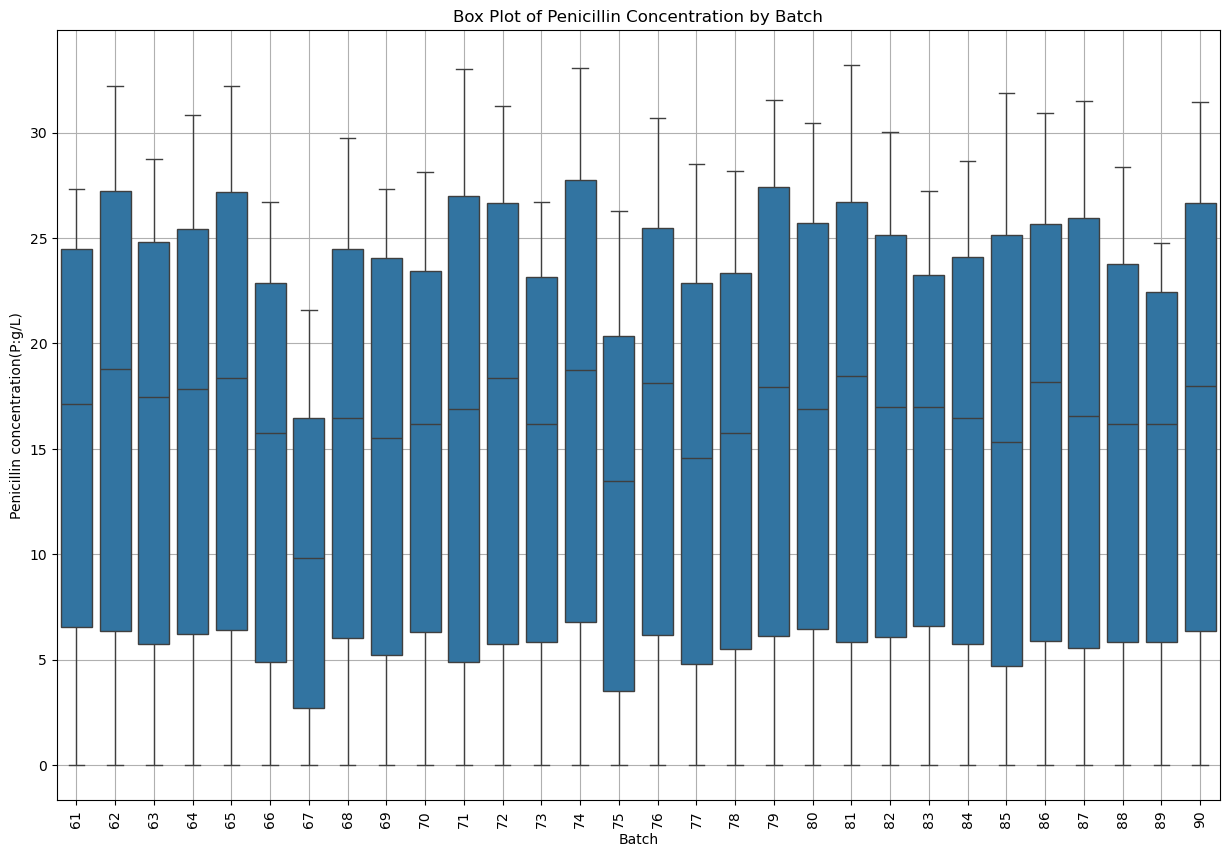

In [6]:
# Combine all batch data for box plot visualization
all_batches = []
for i in range(61, 91):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    df['Batch'] = i
    all_batches.append(df)

all_combined_df = pd.concat(all_batches, ignore_index=True)
# all_combined_df: all the batches in one table!
# Plot box plots for each batch
plt.figure(figsize=(15, 10))
sns.boxplot(x='Batch', y=par, data=all_combined_df)
plt.title('Box Plot of Penicillin Concentration by Batch')
plt.xlabel('Batch')
plt.ylabel(par)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


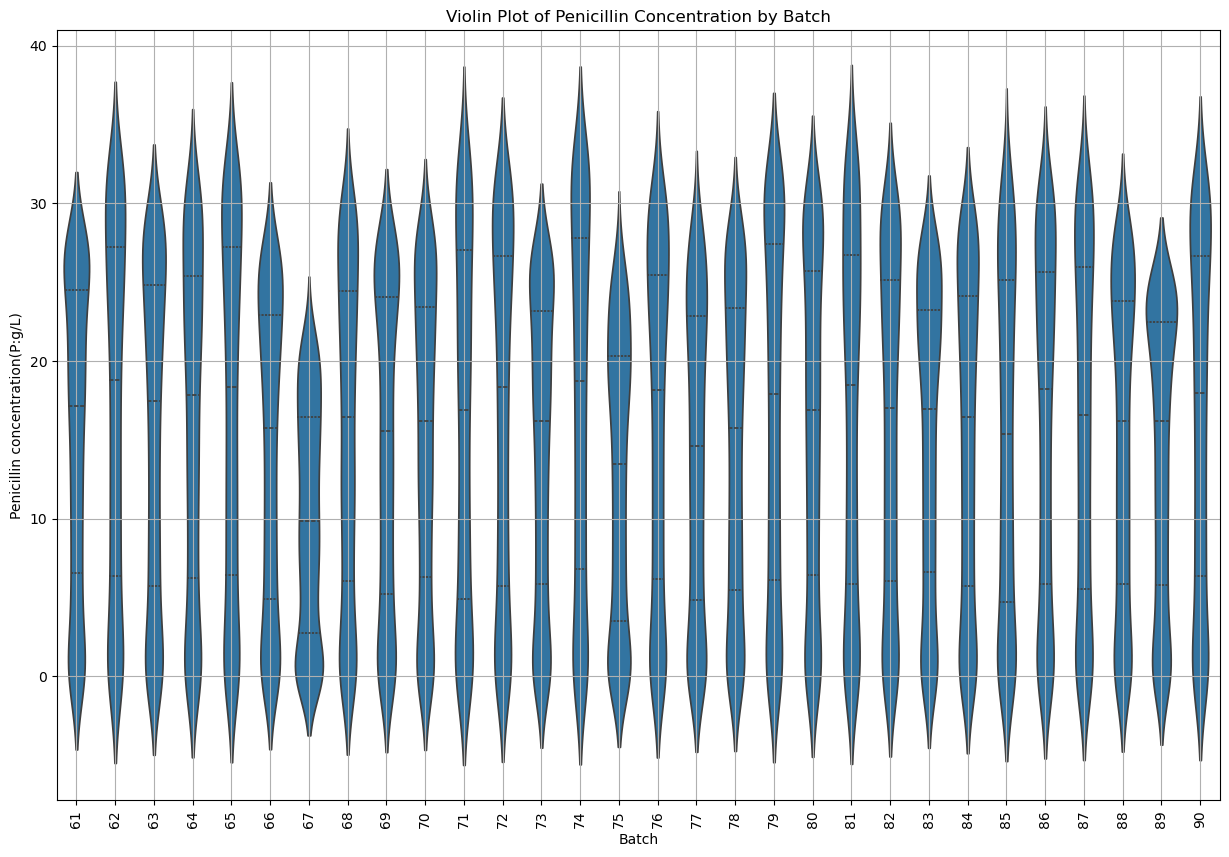

In [7]:
# Plot violin plots for each batch
plt.figure(figsize=(15, 10))
sns.violinplot(x='Batch', y=par, data=all_combined_df, inner='quartile')
plt.title('Violin Plot of Penicillin Concentration by Batch')
plt.xlabel('Batch')
plt.ylabel(par)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Criterion Setup for all the batches - Percentile

### **Criteria Selection Summary**


Additionally, percentiles were calculated to establish criteria for categorizing the performance of the batches:

10th Percentile
25th Percentile (Q1)
50th Percentile (Median)
75th Percentile (Q3)
90th Percentile

### **Criteria for Evaluation**

The penicillin concentration values were categorized into five performance levels based on the calculated percentiles:

- **Optimal:** Values above the 90th percentile.
- **Above Average:** Values between the 75th and 90th percentiles.
- **Average:** Values between the 25th and 75th percentiles.
- **Below Average:** Values between the 10th and 25th percentiles.
- **Non-optimal:** Values below the 10th percentile.


***Rationale for Criteria***

The choice of these criteria is based on the need to objectively categorize batch performance using statistical measures:

Percentile-Based Categorization: Percentiles are robust statistical measures that help in understanding the distribution of data. They allow us to classify the data into meaningful performance levels without being affected by outliers.
Focus on High Performance: The criteria emphasize identifying the top-performing batches (Optimal and Above Average) by focusing on the higher percentiles. This approach helps in recognizing the batches that achieve the highest penicillin concentration, which is crucial for optimizing production.
Balanced Evaluation: By including categories for Average, Below Average, and Non-optimal performance, the criteria ensure a comprehensive evaluation. This helps in identifying areas of improvement and understanding the distribution of performance across all batches.
Summary of Percentiles

10th Percentile: The concentration value below which 10% of the data falls.
25th Percentile (Q1): The concentration value below which 25% of the data falls.
50th Percentile (Median): The middle concentration value.
75th Percentile (Q3): The concentration value below which 75% of the data falls.
90th Percentile: The concentration value below which 90% of the data falls.
By implementing these criteria, we can systematically evaluate and compare the performance of different batches, leading to data-driven decisions for process optimization.

In [8]:
import os
import pandas as pd
import numpy as np

# Calculate percentiles
percentiles = np.percentile(combined_parameter_values, [10, 25, 50, 75, 90])
p10, p25, p50, p75, p90 = percentiles

# Define the criteria based on percentiles
def categorize_value(value):
    if value >= p90:
        return 'Optimal'
    elif value >= p75:
        return 'Above Average'
    elif value >= p25:
        return 'Average'
    elif value >= p10:
        return 'Below Average'
    else:
        return 'Non-optimal'

# Apply criteria to the combined data
combined_df['Criteria'] = combined_df[par].apply(categorize_value)

# Display the summary DataFrame
print("Statistical Summary of Combined Data (For The Analyzing Parameter):")
print(stats_combined)

# Display the combined DataFrame with criteria
print("\nCombined Penicillin Concentration with Criteria:")
print(combined_df)

# Print the summary of percentiles
print("\nPercentiles:")
print(f"10th Percentile: {p10}")
print(f"25th Percentile (Q1): {p25}")
print(f"50th Percentile (Median): {p50}")
print(f"75th Percentile (Q3): {p75}")
print(f"90th Percentile: {p90}")


Statistical Summary of Combined Data (For The Analyzing Parameter):
  Statistic (Agg Batched)  Value (Agg Batched)
0                    Mean         1.540989e+01
1                  Median         1.656000e+01
2                    Mode         1.000000e-03
3                     Std         1.033733e+01
4                     Min         3.694700e-26
5                     Max         3.320900e+01
6                      Q1         5.675875e+00
7                      Q3         2.468800e+01
8                     IQR         1.901212e+01

Combined Penicillin Concentration with Criteria:
       Penicillin concentration(P:g/L)       Criteria
0                             0.001000  Below Average
1                             0.001000  Below Average
2                             0.000999  Below Average
3                             0.000999  Below Average
4                             0.000998  Below Average
...                                ...            ...
33695                        31.43

# Criteria Weight Distribution for Batch Evaluation
## Non-Interactive Batch Evaluation Summary

In [9]:
import pandas as pd
import numpy as np
import os

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Parameter of interest
par = 'Penicillin concentration(P:g/L)'

# Evaluate each batch and store the summary
batch_summaries = []

for i in range(61, 91):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    batch_df = pd.read_csv(file_path)
    
    # Apply the criteria to the batch data
    batch_df['Criteria'] = batch_df[par].apply(categorize_value)
    
    # Calculate the proportion of each category
    category_counts = batch_df['Criteria'].value_counts(normalize=True) * 100
    summary = category_counts.to_dict()
    summary['Batch'] = i  # Add batch identifier
    batch_summaries.append(summary)

# Convert batch summaries to DataFrame
batch_performance = pd.DataFrame(batch_summaries).fillna(0)
batch_performance = batch_performance[['Batch', 'Optimal', 'Above Average', 'Average', 'Below Average', 'Non-optimal']]

# # Display the summary DataFrame
# print(batch_performance)
batch_performance
# Optionally, save the summary to a CSV file
# summary_df.to_csv('batch_performance.csv', index=False)


,Batch,Optimal,Above Average,Average,Below Average,Non-optimal
0,61,0.000000,24.315353,52.531120,13.858921,9.294606
1,62,21.565217,13.565217,41.391304,13.652174,9.826087
2,63,7.913043,17.565217,49.565217,15.217391,9.739130
3,64,15.217391,13.304348,47.565217,14.173913,9.739130
4,65,21.385281,12.727273,42.424242,13.766234,9.696970
5,66,0.000000,17.739130,55.304348,16.956522,10.000000
6,67,0.000000,0.000000,66.227545,20.239521,13.532934
7,68,11.565217,12.782609,51.391304,14.521739,9.739130
8,69,0.000000,22.577778,51.288889,16.177778,9.955556
9,70,0.000000,20.869565,55.478261,13.913043,9.739130


# Interactive Batch Evaluation Summary

In [10]:
import pandas as pd
import numpy as np
import os
from dash import Dash, dcc, html, Input, Output

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Parameter of interest
par = 'Penicillin concentration(P:g/L)'

# Evaluate each batch and store the summary
batch_summaries = {}

for i in range(61, 91):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    batch_df = pd.read_csv(file_path)
    
    # Apply the criteria to the batch data
    batch_df['Criteria'] = batch_df[par].apply(categorize_value)
    
    # Calculate the proportion of each category
    category_counts = batch_df['Criteria'].value_counts(normalize=True) * 100
    summary = category_counts.to_dict()
    
    batch_summaries[i] = summary

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Evaluation Summaries", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(61, 91)],
        value=[],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    html.Button('Show All Batches', id='show-all-button', n_clicks=0, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    html.H2("Evaluation Summary", style={'textAlign': 'center'}),
    html.Table(id='summary-table', style={'width': '80%', 'margin': 'auto', 'borderCollapse': 'collapse', 'backgroundColor': '#2e2e2e', 'color': '#ffffff'})
])

@app.callback(
    Output('batch-selector', 'value'),
    [Input('show-all-button', 'n_clicks')]
)
def show_all_batches(n_clicks):
    if n_clicks > 0:
        return [i for i in range(61, 91)]
    return []

@app.callback(
    Output('summary-table', 'children'),
    [Input('batch-selector', 'value')]
)
def update_summary_table(selected_batches):
    headers = [html.Tr([html.Th("Batch", style={'border': '1px solid #ffffff', 'padding': '8px'})] +
                       [html.Th(category, style={'border': '1px solid #ffffff', 'padding': '8px'}) for category in ['Optimal', 'Above Average', 'Average', 'Below Average', 'Non-optimal']])]
    
    rows = []
    for batch_id in selected_batches:
        summary = batch_summaries.get(batch_id, {})
        row = [html.Td(batch_id, style={'border': '1px solid #ffffff', 'padding': '8px'})]
        for category in ['Optimal', 'Above Average', 'Average', 'Below Average', 'Non-optimal']:
            row.append(html.Td(f"{summary.get(category, 0):.2f}%", style={'border': '1px solid #ffffff', 'padding': '8px'}))
        rows.append(html.Tr(row))
    
    return headers + rows

if __name__ == '__main__':
    app.run_server(debug=True)


# **Allocating Final Score to The Each Batch**

In [11]:
# Assign weights to categories
weights = {
    'Optimal': 5,
    'Above Average': 4,
    'Average': 3,
    'Below Average': 2,
    'Non-optimal': 1
}

# Calculate scores for each batch
batch_performance['Score'] = (batch_performance['Optimal'] * weights['Optimal'] +
                       batch_performance['Above Average'] * weights['Above Average'] +
                       batch_performance['Average'] * weights['Average'] +
                       batch_performance['Below Average'] * weights['Below Average'] +
                       batch_performance['Non-optimal'] * weights['Non-optimal']) / 100

# Rank batches based on scores
batch_performance['Rank'] = batch_performance['Score'].rank(ascending=False)

# Sort by rank
batch_performance = batch_performance.sort_values(by='Rank')

# Display the summary DataFrame with ranks
# print(batch_performance[['Batch', 'Score', 'Rank']])
batch_performance


,Batch,Optimal,Above Average,Average,Below Average,Non-optimal,Score,Rank
13,74,23.217391,12.000000,42.086957,12.956522,9.739130,3.260000,1.0
1,62,21.565217,13.565217,41.391304,13.652174,9.826087,3.233913,2.0
18,79,22.212766,11.914894,41.787234,14.553191,9.531915,3.227234,3.0
4,65,21.385281,12.727273,42.424242,13.766234,9.696970,3.223377,4.0
11,72,19.739130,14.434783,40.956522,15.130435,9.739130,3.193043,5.0
29,90,18.521739,14.434783,43.565217,13.739130,9.739130,3.182609,6.0
20,81,18.818182,12.909091,43.636364,14.545455,10.090909,3.158182,7.0
19,80,16.434783,13.304348,46.869565,13.652174,9.739130,3.130435,8.0
25,86,15.913043,14.869565,44.608696,14.782609,9.826087,3.122609,9.0
15,76,14.869565,15.913043,45.217391,14.173913,9.826087,3.118261,10.0


### Interactive Batch Performance Ranking

In [12]:
import pandas as pd
import numpy as np
import os
from dash import Dash, dcc, html, Input, Output, State, callback_context

# Load batch performance data with confidence intervals
# batch_performance = pd.read_csv('Pen_performance_summary.csv')

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Performance Ranking", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(61, 91)],
        value=[],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    html.Button('Show All Batches', id='show-all-button', n_clicks=0, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    html.Button('Show Top N Batches', id='show-top-button', n_clicks=0, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    dcc.Input(id='top-n-input', type='number', value=5, min=1, max=30, step=1, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    html.Button('Show Bottom N Batches', id='show-bottom-button', n_clicks=0, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    dcc.Input(id='bottom-n-input', type='number', value=5, min=1, max=30, step=1, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    dcc.Dropdown(
        id='sort-selector',
        options=[
            {'label': 'Rank', 'value': 'Rank'},
            {'label': 'Score', 'value': 'Score'},
            {'label': 'Batch', 'value': 'Batch'}
        ],
        value='Rank',
        clearable=False,
        style={'width': '50%', 'margin': 'auto'}
    ),
    html.H2("Ranking Summary", style={'textAlign': 'center'}),
    html.Table(id='ranking-table', style={'width': '80%', 'margin': 'auto', 'borderCollapse': 'collapse', 'backgroundColor': '#2e2e2e', 'color': '#ffffff'})
])

@app.callback(
    Output('batch-selector', 'value'),
    [Input('show-all-button', 'n_clicks'),
     Input('show-top-button', 'n_clicks'),
     Input('show-bottom-button', 'n_clicks')],
    [State('top-n-input', 'value'),
     State('bottom-n-input', 'value')]
)
def update_batch_selection(show_all_clicks, show_top_clicks, show_bottom_clicks, top_n, bottom_n):
    ctx = callback_context
    if not ctx.triggered:
        return []
    
    button_id = ctx.triggered[0]['prop_id'].split('.')[0]
    
    if button_id == 'show-all-button':
        return [i for i in range(61, 91)]
    elif button_id == 'show-top-button':
        top_batches = batch_performance.nsmallest(top_n, 'Rank')['Batch'].tolist()
        return top_batches
    elif button_id == 'show-bottom-button':
        bottom_batches = batch_performance.nlargest(bottom_n, 'Rank')['Batch'].tolist()
        return bottom_batches
    return []

@app.callback(
    Output('ranking-table', 'children'),
    [Input('batch-selector', 'value'),
     Input('sort-selector', 'value')]
)
def update_ranking_table(selected_batches, sort_by):
    if not selected_batches:
        return []
    
    # Sort the summary DataFrame based on the selected sort option
    sorted_df = batch_performance[batch_performance['Batch'].isin(selected_batches)].sort_values(by=sort_by)
    
    headers = [html.Tr([html.Th("Batch", style={'border': '1px solid #ffffff', 'padding': '8px'})] +
                       [html.Th(column, style={'border': '1px solid #ffffff', 'padding': '8px'}) for column in sorted_df.columns[1:]])]
    
    rows = []
    for _, row_data in sorted_df.iterrows():
        row = [html.Td(row_data['Batch'], style={'border': '1px solid #ffffff', 'padding': '8px'})]
        row.extend([html.Td(f"{row_data[col]:.2f}" if isinstance(row_data[col], float) else row_data[col], style={'border': '1px solid #ffffff', 'padding': '8px'}) for col in sorted_df.columns[1:]])
        rows.append(html.Tr(row))
    
    return headers + rows

if __name__ == '__main__':
    app.run_server(debug=True)


# Interactive Visualization for Comparative Analysis (Best and Worst as Starting Plots)

In [13]:
import pandas as pd
import numpy as np
import os
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output
from scipy.stats import gaussian_kde

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Get the best and worst batch based on the rank
best_batch = batch_performance.loc[batch_performance['Rank'].idxmin()]['Batch']
worst_batch = batch_performance.loc[batch_performance['Rank'].idxmax()]['Batch']

# Parameter of interest
par = 'Penicillin concentration(P:g/L)'

# Function to load data for a given batch
def load_batch_data(batch_number):
    file_path = os.path.join(folder_path, f'Batch_{batch_number}.csv')
    return pd.read_csv(file_path)

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Density Comparison", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(61, 91)],
        value=[best_batch, worst_batch],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='density-plot', style={'height': '60vh'}),
    html.H2("Batch Variability Comparison", style={'textAlign': 'center'}),
    html.Table(id='comparison-table', style={'width': '80%', 'margin': 'auto', 'borderCollapse': 'collapse', 'backgroundColor': '#2e2e2e', 'color': '#ffffff'})
])

@app.callback(
    Output('density-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_density_plot(selected_batches):
    fig = go.Figure()
    
    for batch in selected_batches:
        df = load_batch_data(batch)
        penicillin_data = df[par]

        # Calculate KDE
        kde = gaussian_kde(penicillin_data)
        x_values = np.linspace(penicillin_data.min(), penicillin_data.max(), 1000)
        kde_values = kde(x_values)
        
        fig.add_trace(go.Histogram(x=penicillin_data, name=f'Batch {batch}', opacity=0.6, histnorm='probability density'))
        fig.add_trace(go.Scatter(x=x_values, y=kde_values, mode='lines', name=f'Batch {batch} (KDE)', line=dict(width=2)))
    
    fig.update_layout(
        barmode='overlay',
        title='Distribution of Penicillin Concentration',
        xaxis_title=par,
        yaxis_title='Density',
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#1e1e1e',
        font_color='#ffffff'
    )
    return fig

@app.callback(
    Output('comparison-table', 'children'),
    [Input('batch-selector', 'value')]
)
def update_comparison_table(selected_batches):
    headers = html.Tr([html.Th("Metric", style={'border': '1px solid #ffffff', 'padding': '8px'})] +
                      [html.Th(f'Batch {batch}', style={'border': '1px solid #ffffff', 'padding': '8px'}) for batch in selected_batches])
    
    rows = []
    metrics = ['Mean', 'Median', 'Standard Deviation', 'IQR']
    
    for metric in metrics:
        row = [html.Td(metric, style={'border': '1px solid #ffffff', 'padding': '8px'})]
        for batch in selected_batches:
            df = load_batch_data(batch)
            if metric == 'Mean':
                value = df[par].mean()
            elif metric == 'Median':
                value = df[par].median()
            elif metric == 'Standard Deviation':
                value = df[par].std()
            elif metric == 'IQR':
                value = df[par].quantile(0.75) - df[par].quantile(0.25)
            row.append(html.Td(f"{value:.2f}", style={'border': '1px solid #ffffff', 'padding': '8px'}))
        rows.append(html.Tr(row))
    
    return [headers] + rows

if __name__ == '__main__':
    app.run_server(debug=True)


In [14]:
import pandas as pd
import numpy as np
import os
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output, State, callback_context

# Get the best and worst batch based on the rank
best_batch = batch_performance.loc[batch_performance['Rank'].idxmin()]['Batch']
worst_batch = batch_performance.loc[batch_performance['Rank'].idxmax()]['Batch']

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Parameter of interest
par = 'Penicillin concentration(P:g/L)'

# Function to load data for a given batch
def load_batch_data(batch_number):
    file_path = os.path.join(folder_path, f'Batch_{batch_number}.csv')
    df = pd.read_csv(file_path)
    df['Batch'] = batch_number
    return df

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Density Comparison", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(61, 91)],
        value=[best_batch, worst_batch],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='density-plot', style={'height': '60vh'}),
])

@app.callback(
    Output('density-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_density_plot(selected_batches):
    if not selected_batches:
        return go.Figure()

    fig = go.Figure()

    for batch in selected_batches:
        df = load_batch_data(batch)
        hist_trace_name = f'Batch {batch}'

        fig.add_trace(go.Histogram(
            x=df[par],
            histnorm='density',
            name=hist_trace_name,
            opacity=0.6
        ))

        median = df[par].median()
        mode = df[par].mode().iloc[0] if not df[par].mode().empty else np.nan
        iqr = df[par].quantile(0.75) - df[par].quantile(0.25)

        fig.add_trace(go.Scatter(
            x=[median],
            y=[0],
            mode='markers+text',
            text=[f'Median: {median:.2f}<br>Mode: {mode:.2f}<br>IQR: {iqr:.2f}'],
            textposition='top center',
            marker=dict(color='red', size=10, symbol='diamond'),
            hoverinfo='text',
            showlegend=False  # Hide legend for scatter trace
        ))

    fig.update_layout(
        title='Density Plot of Penicillin Concentration',
        xaxis_title='Penicillin concentration(P:g/L)',
        yaxis_title='Density',
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#1e1e1e',
        font_color='#ffffff',
        barmode='overlay'
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


In [15]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

best_batch = batch_performance.loc[batch_performance['Rank'].idxmin()]['Batch']
worst_batch = batch_performance.loc[batch_performance['Rank'].idxmax()]['Batch']

# Parameter of interest
par = 'Penicillin concentration(P:g/L)'

# Function to load data for a given batch
def load_batch_data(batch_number):
    file_path = os.path.join(folder_path, f'Batch_{batch_number}.csv')
    df = pd.read_csv(file_path)
    df['Batch'] = batch_number
    return df

# Function to calculate metrics for hover info
def calculate_metrics(df):
    metrics = {}
    metrics['Median'] = df[par].median()
    metrics['Mode'] = df[par].mode().iloc[0] if not df[par].mode().empty else np.nan
    metrics['Min'] = df[par].min()
    metrics['Max'] = df[par].max()
    metrics['IQR'] = df[par].quantile(0.75) - df[par].quantile(0.25)
    return metrics

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Box Plot Comparison", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(61, 91)],
        value=[best_batch, worst_batch],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='box-plot', style={'height': '60vh'})
])

@app.callback(
    Output('box-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_box_plot(selected_batches):
    combined_df = pd.concat([load_batch_data(batch) for batch in selected_batches], ignore_index=True)
    
    fig = go.Figure()
    
    for batch in selected_batches:
        df = combined_df[combined_df['Batch'] == batch]
        metrics = calculate_metrics(df)
        
        fig.add_trace(go.Box(
            y=df[par],
            name=f'Batch {batch}',
            boxpoints='all',
            jitter=0.3,
            pointpos=-1.8,
            hovertext=[
                f"Median: {metrics['Median']:.2f}<br>"
                f"Mode: {metrics['Mode']:.2f}<br>"
                f"Min: {metrics['Min']:.2f}<br>"
                f"Max: {metrics['Max']:.2f}<br>"
                f"IQR: {metrics['IQR']:.2f}"
                for _ in range(len(df))
            ]
        ))
    
    fig.update_layout(
        title='Box Plot of Penicillin Concentration',
        xaxis_title='Batch',
        yaxis_title=par,
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#1e1e1e',
        font_color='#ffffff'
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

In [16]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

best_batch = batch_performance.loc[batch_performance['Rank'].idxmin()]['Batch']
worst_batch = batch_performance.loc[batch_performance['Rank'].idxmax()]['Batch']

# Parameter of interest
par = 'Penicillin concentration(P:g/L)'

# Function to load data for a given batch
def load_batch_data(batch_number):
    file_path = os.path.join(folder_path, f'Batch_{batch_number}.csv')
    df = pd.read_csv(file_path)
    df['Batch'] = batch_number
    return df

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Distribution Comparison", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(1, 31)],
        value=[best_batch, worst_batch],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='violin-plot', style={'height': '60vh'}),
])

@app.callback(
    Output('violin-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_violin_plot(selected_batches):
    if not selected_batches:
        return go.Figure()

    combined_df = pd.concat([load_batch_data(batch) for batch in selected_batches], ignore_index=True)
    
    fig = go.Figure()

    for batch in selected_batches:
        batch_data = combined_df[combined_df['Batch'] == batch]
        fig.add_trace(go.Violin(
            x=batch_data['Batch'], 
            y=batch_data[par],
            name=f'Batch {batch}',
            box_visible=True,
            meanline_visible=True
        ))
        
        median = batch_data[par].median()
        mode = batch_data[par].mode().iloc[0] if not batch_data[par].mode().empty else np.nan
        iqr = batch_data[par].quantile(0.75) - batch_data[par].quantile(0.25)

        fig.add_trace(go.Scatter(
            x=[batch], 
            y=[median],
            mode='markers+text',
            text=[f'Median: {median:.2f}<br>Mode: {mode:.2f}<br>IQR: {iqr:.2f}'],
            textposition='top center',
            marker=dict(color='red', size=10, symbol='diamond'),
            hoverinfo='text',
            showlegend=False  # Remove scatter traces from legend
        ))

    fig.update_layout(
        title='Violin Plot of Penicillin Concentration',
        xaxis_title='Batch',
        yaxis_title=par,
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#1e1e1e',
        font_color='#ffffff'
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


### Quantifying the varibilities of the best and worst batches

In [17]:
batch_performance

,Batch,Optimal,Above Average,Average,Below Average,Non-optimal,Score,Rank
13,74,23.217391,12.000000,42.086957,12.956522,9.739130,3.260000,1.0
1,62,21.565217,13.565217,41.391304,13.652174,9.826087,3.233913,2.0
18,79,22.212766,11.914894,41.787234,14.553191,9.531915,3.227234,3.0
4,65,21.385281,12.727273,42.424242,13.766234,9.696970,3.223377,4.0
11,72,19.739130,14.434783,40.956522,15.130435,9.739130,3.193043,5.0
29,90,18.521739,14.434783,43.565217,13.739130,9.739130,3.182609,6.0
20,81,18.818182,12.909091,43.636364,14.545455,10.090909,3.158182,7.0
19,80,16.434783,13.304348,46.869565,13.652174,9.739130,3.130435,8.0
25,86,15.913043,14.869565,44.608696,14.782609,9.826087,3.122609,9.0
15,76,14.869565,15.913043,45.217391,14.173913,9.826087,3.118261,10.0


# Confidence Intervals - Bootstrapping Confidence Intervals

In [18]:
import pandas as pd
import numpy as np
import os

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Function to calculate bootstrap confidence intervals
def bootstrap_ci(data, func=np.mean, n_resamples=1000, ci=95):
    """Calculate bootstrap confidence intervals."""
    n_size = len(data)
    stats = []
    for _ in range(n_resamples):
        sample = np.random.choice(data, n_size, replace=True)
        stat = func(sample)
        stats.append(stat)
    lower = np.percentile(stats, (100 - ci) / 2)
    upper = np.percentile(stats, 100 - (100 - ci) / 2)
    return lower, upper

# Add confidence intervals for scores
ci_lower_bounds = []
ci_upper_bounds = []
precisions = []

for i in range(61, 91):
    scores = []
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    batch_df = pd.read_csv(file_path)
    for _ in range(1000):  # Number of bootstrap samples
        resampled_df = batch_df.sample(frac=1, replace=True)
        resampled_df['Criteria'] = resampled_df[par].apply(categorize_value)
        category_counts = resampled_df['Criteria'].value_counts(normalize=True) * 100
        score = (category_counts.get('Optimal', 0) * weights['Optimal'] +
                 category_counts.get('Above Average', 0) * weights['Above Average'] +
                 category_counts.get('Average', 0) * weights['Average'] +
                 category_counts.get('Below Average', 0) * weights['Below Average'] +
                 category_counts.get('Non-optimal', 0) * weights['Non-optimal']) / 100
        scores.append(score)
    lower, upper = bootstrap_ci(scores, np.mean)
    ci_lower_bounds.append(lower)
    ci_upper_bounds.append(upper)
    # precisions.append((upper - lower) / batch_performance.loc[batch_performance['Batch'] == i, 'Score'].values[0] * 100)  # Precision as percentage
    # precisions.append(upper - lower)
    precisions.append(1 / (upper - lower))  # Precision as inverse of CI width

batch_performance['CI Lower'] = ci_lower_bounds
batch_performance['CI Upper'] = ci_upper_bounds
batch_performance['Precision'] = precisions

# Create batch_performance_with_ci variable
batch_performance_with_ci = batch_performance[['Batch', 'Optimal', 'Above Average', 'Average', 'Below Average', 'Non-optimal', 'Score', 'Rank', 'CI Lower', 'CI Upper', 'Precision']]

# Display the batch_performance_with_ci DataFrame
# print(batch_performance_with_ci)

# Optionally, save the batch_performance_with_ci to a CSV file
# batch_performance_with_ci.to_csv('batch_performance_with_ci.csv', index=False)
batch_performance_with_ci

,Batch,Optimal,Above Average,Average,Below Average,Non-optimal,Score,Rank,CI Lower,CI Upper,Precision
13,74,23.217391,12.000000,42.086957,12.956522,9.739130,3.260000,1.0,2.916464,2.919714,307.717844
1,62,21.565217,13.565217,41.391304,13.652174,9.826087,3.233913,2.0,3.232693,3.236944,235.247189
18,79,22.212766,11.914894,41.787234,14.553191,9.531915,3.227234,3.0,2.985797,2.989559,265.809911
4,65,21.385281,12.727273,42.424242,13.766234,9.696970,3.223377,4.0,3.100936,3.105045,243.414577
11,72,19.739130,14.434783,40.956522,15.130435,9.739130,3.193043,5.0,3.220218,3.224645,225.899196
29,90,18.521739,14.434783,43.565217,13.739130,9.739130,3.182609,6.0,2.807228,2.810212,335.071822
20,81,18.818182,12.909091,43.636364,14.545455,10.090909,3.158182,7.0,2.526358,2.529590,309.448367
19,80,16.434783,13.304348,46.869565,13.652174,9.739130,3.130435,8.0,3.017968,3.021655,271.183243
25,86,15.913043,14.869565,44.608696,14.782609,9.826087,3.122609,9.0,2.864570,2.867652,324.387448
15,76,14.869565,15.913043,45.217391,14.173913,9.826087,3.118261,10.0,2.873725,2.876989,306.341944


In [19]:
import pandas as pd
import numpy as np
import os
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

best_batch = batch_performance.loc[batch_performance['Rank'].idxmin()]['Batch']
worst_batch = batch_performance.loc[batch_performance['Rank'].idxmax()]['Batch']

# Load all batches into a single DataFrame
all_batches = []
for i in range(61, 91):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    df['Batch ID'] = i
    all_batches.append(df)
all_batches_df = pd.concat(all_batches, ignore_index=True)

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Penicillin Concentration Analysis"),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(61, 91)],
        value=[best_batch, worst_batch],
        multi=True,
        clearable=False,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='density-plot'),
])

@app.callback(
    Output('density-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_density_plot(selected_batches):
    fig = go.Figure()

    for batch in selected_batches:
        batch_df = all_batches_df[all_batches_df['Batch ID'] == batch]
        penicillin_data = batch_df['Penicillin concentration(P:g/L)']

        # Calculate confidence intervals using bootstrapping
        def bootstrap_confidence_interval(data, num_bootstrap=1000, confidence_level=0.95):
            bootstrap_samples = np.random.choice(data, size=(num_bootstrap, len(data)), replace=True)
            bootstrap_means = np.mean(bootstrap_samples, axis=1)
            lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
            upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
            return lower_bound, upper_bound

        ci_lower, ci_upper = bootstrap_confidence_interval(penicillin_data)

        # Add density plot
        fig.add_trace(go.Histogram(
            x=penicillin_data,
            histnorm='probability density',
            name=f'Batch {batch}',
            opacity=0.6
        ))

        # Add confidence intervals with annotations
        color = 'blue' if batch == best_batch else 'red'
        fig.add_vline(x=ci_lower, line=dict(color=color, dash='dash'))
        fig.add_annotation(
            x=ci_lower, y=0.9, yref='paper', text=f'CI Lower Batch {batch}: {ci_lower:.2f}',
            showarrow=False, font=dict(color=color), bgcolor='rgba(255, 255, 255, 0.8)'
        )
        fig.add_vline(x=ci_upper, line=dict(color=color, dash='dash'))
        fig.add_annotation(
            x=ci_upper, y=0.95, yref='paper', text=f'CI Upper Batch {batch}: {ci_upper:.2f}',
            showarrow=False, font=dict(color=color), bgcolor='rgba(255, 255, 255, 0.8)'
        )

    fig.update_layout(
        title='Density Plot of Penicillin Concentration with Confidence Intervals',
        xaxis_title='Penicillin concentration(P:g/L)',
        yaxis_title='Density',
        barmode='overlay',
        legend_title='Batch',
        template='plotly_dark'
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


## Plotting the Batch Performance - Final Results (Donut charts in the Scatter plot)

### Extracting Concentration and time separately 

In [2]:
import os
import pandas as pd

# Directory containing the CSV files
directory = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Initialize an empty list to hold the penicillin columns
penicillin_columns = []
max_time_col = None
max_non_na_count = 0

# Loop over the 30 CSV files
for i in range(61, 91):
    file_path = os.path.join(directory, f'batch_{i}.csv')
    
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Extract the 'Time (h)' and 'Penicillin concentration(P:g/L)' columns
    time_col = df['Time (h)']
    penicillin_col = df['Penicillin concentration(P:g/L)'].rename(f'Penicillin_{i}')
    
    # Append the penicillin column to the list
    penicillin_columns.append(penicillin_col)
    
    # Check if this time column has more non-NaN values than the current max
    non_na_count = time_col.notna().sum()
    if non_na_count > max_non_na_count:
        max_non_na_count = non_na_count
        max_time_col = time_col.rename('Time')

# Combine the selected time column with all penicillin columns
pen_time_61_90 = pd.concat([max_time_col] + penicillin_columns, axis=1)

# Display the final DataFrame (for verification)
pen_time_61_90

# Save the resulting DataFrame to a new CSV file
# output_path = os.path.join('/Users/farid/Documents/Thesis/DATA - Mendeley_data/1- Penicillin Concentration Analysis', 'Penicillin_vs_time_61_90.csv')
# pen_time_61_90.to_csv(output_path, index=False)

# print(f"Data extracted and saved to {output_path}")


,Time,Penicillin_61,Penicillin_62,Penicillin_63,Penicillin_64,Penicillin_65,Penicillin_66,Penicillin_67,Penicillin_68,Penicillin_69,...,Penicillin_81,Penicillin_82,Penicillin_83,Penicillin_84,Penicillin_85,Penicillin_86,Penicillin_87,Penicillin_88,Penicillin_89,Penicillin_90
0,0.2,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,3.694700e-26,0.001000,3.422400e-25,0.001000,0.001000,0.001000,0.001000
1,0.4,0.001000,0.000999,0.001000,0.001000,0.001000,0.000999,0.000999,0.001000,0.001000,...,0.001000,0.000999,0.000999,3.733500e-18,0.001000,1.000000e-03,0.001000,0.001000,0.001000,0.001000
2,0.6,0.000999,0.000999,0.000999,0.000999,0.000999,0.000998,0.000999,0.000999,0.000999,...,0.000999,0.000999,0.000999,4.250900e-18,0.000999,9.991600e-04,0.000999,0.000999,0.000999,0.000999
3,0.8,0.000999,0.000998,0.000999,0.000999,0.000999,0.000997,0.000998,0.000999,0.000999,...,0.000999,0.000998,0.000998,6.062400e-18,0.000999,9.983700e-04,0.000999,0.000999,0.000999,0.000999
4,1.0,0.000998,0.000998,0.000998,0.000998,0.000998,0.000996,0.000998,0.000998,0.000998,...,0.000998,0.000998,0.000997,5.515400e-18,0.000998,9.977400e-04,0.000998,0.000998,0.000998,0.000998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,240.2,27.290000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27.209000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1201,240.4,27.287000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27.210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202,240.6,27.285000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27.212000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1203,240.8,27.283000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27.213000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
